In [ ]:
#Install & Import Packages

!pip install torch torchvision matplotlib --quiet

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

* !pip install ...--> Installs the required Python libraries.

* torch --> The main PyTorch deep learning framework.

* torchvision --> Contains datasets and image processing utilities.

* matplotlib --> Used for plotting and displaying images.

* --quiet --> Suppresses extra installation output to keep the notebook clean.

* import torch → Loads PyTorch into memory.

* import torch.nn as nn → Lets us define neural network layers.

* import torch.optim as optim → Gives access to optimization algorithms (like Adam, SGD).

* import torchvision → Lets us access datasets (MNIST), transforms, and models.

* import torchvision.transforms as transforms → Used to process/transform images before feeding them to the model.

* import matplotlib.pyplot as plt → For displaying images and plots.



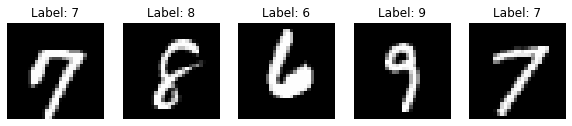

In [12]:
# Transform: Convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download MNIST dataset
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

# Show 5 sample images
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].axis('off')
plt.show()

* transforms.Compose([...]) → Combines multiple image transformations.

* transforms.ToTensor() → Converts a PIL image or NumPy array into a PyTorch tensor (0–1 range).

* transforms.Normalize((0.5,), (0.5,)) → Normalizes pixel values to be between -1 and 1, which helps training.

* Loads the training MNIST dataset.

* root='./data' → Saves the dataset in the "data" folder.

* train=True → Specifies that we want the training split.

* download=True → Downloads it if it’s not already saved.

* transform=transform → Applies our preprocessing (ToTensor + Normalize).

* Creates a data loader to feed data in batches to the model.

* batch_size=32 → 32 images per training step.

* shuffle=True → Randomizes the order for better training.

* Loads the test MNIST dataset (no shuffling, since testing is in fixed order).

* iter(train_loader) → Creates an iterator over the training data.

* next(...) → Gets the first batch (images + labels).

* Creates a row of 5 plots (1, 5 means 1 row, 5 columns).

* figsize=(10, 2) → Sets the size in inches.

* imshow(...) → Displays the image.

* .squeeze() → Removes extra dimensions (from 1×28×28 to 28×28).

* cmap='gray' → Displays the image in grayscale.

* set_title(...) → Shows the digit label above each image.

* axis('off') → Hides the axis.

* plt.show() → Displays the plot.


In [16]:
# Define Model

class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DigitClassifier()

* class DigitClassifier(nn.Module) → Creates a custom neural network.

* super(...).__init__() → Initializes the base nn.Module class.

* nn.Linear(in_features, out_features) → A fully connected layer.

  28*28 → Flattened size of MNIST images.

  128, 64 → Number of neurons in hidden layers.

  10 → Output neurons for digits 0–9.
    

In [17]:
# Train Model

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 2  # Short training for speed
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/2, Loss: 0.0374
Epoch 2/2, Loss: 0.1733


* epochs → Number of training passes over the dataset.

* optimizer.zero_grad() → Clears old gradients.

* model(images) → Runs images through the model.

* loss = criterion(...) → Calculates the error.

* loss.backward() → Computes gradients via backpropagation.

* optimizer.step() → Updates model weights.

* print(...) → Shows training progress.


In [18]:
# Test Model

correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 95.27%


* torch.no_grad() → Disables gradient calculation (faster, less memory).

* torch.max(outputs, 1) → Finds predicted label with highest score.

* labels.size(0) → Number of samples in batch.

* (predicted == labels) → Compares predictions with actual labels.

* sum().item() → Counts correct predictions.

* Prints accuracy in percentage.
